In [73]:
import pandas as pd
pd.options.display.max_rows = 10

# Methods Applied


## Sampling Data 

In [2]:
acf = pd.read_csv('../../../csv/acts_sections.csv', nrows=100)

print(acf)

                 ddl_case_id    act  section  bailable_ipc  \
0   06-03-02-210100004042014  17353      NaN           NaN   
1   23-34-01-229900001012019   4759      NaN           NaN   
2   13-18-03-204000030972016  17353      NaN           NaN   
3   23-28-01-220102000232016   4759      NaN           NaN   
4   01-35-05-203007002652012  17353      NaN           NaN   
..                       ...    ...      ...           ...   
95  11-26-03-220300010782015  17353      NaN           NaN   
96  01-23-06-200166040812015  17353      NaN           NaN   
97  08-04-04-214200017112016  17353      NaN           NaN   
98  13-06-02-207100027562016  17353      NaN           NaN   
99  04-03-01-202000001762015  17353      NaN           NaN   

    number_sections_ipc  criminal  
0                   1.0         1  
1                   NaN         1  
2                   1.0         1  
3                   NaN         1  
4                   1.0         1  
..                  ...       ...  
95 

In [3]:
jdf = pd.read_csv('../../../csv/judges_clean.csv', nrows=100)

print(jdf)

    ddl_judge_id  state_code  dist_code  court_no  \
0              1           1          1         1   
1              2           1          1         1   
2              3           1          1         1   
3              4           1          1         1   
4              5           1          1         1   
..           ...         ...        ...       ...   
95            96           1          1         4   
96            97           1          1         4   
97            98           1          1         4   
98            99           1          1         4   
99           100           1          1         4   

                 judge_position female_judge  start_date    end_date  
0     chief judicial magistrate  0 nonfemale  20-09-2013  20-02-2014  
1     chief judicial magistrate  0 nonfemale  31-10-2013  20-02-2014  
2     chief judicial magistrate  0 nonfemale  21-02-2014  31-05-2016  
3     chief judicial magistrate  0 nonfemale  01-06-2016  06-06-2016  
4     ch

In [70]:
csf = pd.read_csv('../../../csv/cases/cases_2010.csv')
#5319
# loctest = csf.loc[csf['cino'] == 'MHNB030000032010']
# print(loctest)
# print(csf)

In [74]:
print(csf["date_of_decision"])

0          2011-06-19
1          2010-11-21
2          2010-11-21
3          2010-11-21
4          2010-11-21
              ...    
4281322    2010-07-12
4281323    2013-12-22
4281324    2013-04-21
4281325    2019-11-30
4281326    2017-01-07
Name: date_of_decision, Length: 4281327, dtype: object


## Classification of Crimes

### Sources
List of crimes against women: https://ncrb.gov.in/en/crime-india-year-2014
- 2014 chosen as mid-point
> !Change this to most crimes year!
- List also unchanging in 2013-2015

In [5]:
crimes_set = {'509', '304B', '365', 'Immoral Traffic', '354', '511', 
            'Dowry', '376', 'Sati', '364', '306', '366', '367', '368', '369',
            '364A', 'Indecent Representation', 'Women', 'Woman', 'domestic Violence', 
            '363', '498A'}



ACTS_TRUE_DF is dataframe of keys of all acts which are related to crimes against women. 

In [6]:
act_key_df = pd.read_csv('../../../csv/keys/act_key.csv')

# check which rows match
act_key_df['tokens'] = act_key_df['act_s'].apply(lambda x: str(x).split())
act_key_df['matches'] = act_key_df['tokens'].apply(lambda x: list(crimes_set.intersection(x)))
act_key_df['is_against_women'] = act_key_df['matches'].apply(lambda x: True if x else False)

# pick out rows which match
acts_true_df = act_key_df.loc[act_key_df['is_against_women']==True]
print(acts_true_df)
acts_true_df.to_csv('all_gender_crimes_acts.csv', index=False)

                                                   act_s  count      act  \
46           ..143 147 323 324 354 341 504 506.2.r/w 149    1.0     46.0   
61     /U/S 363, 376 of IPC and Sec. 3(I), (II), (V) ...    1.0     61.0   
81     10.Protection of Women from Domestic Violence Act  312.0     81.0   
156    12 R/W sec 17,18,19,20,22 Protection of Women ...   51.0    156.0   
163    12 of Protection of Women from  Domestic Viole...   34.0    163.0   
...                                                  ...    ...      ...   
29393  u/sec.366(A), 376 of IPC, u/s. 4,6,12 of POCSO...    1.0  29393.0   
29394  u/sec.366(A), 376 of IPC, u/sec. 4 of POCSO Ac...    1.0  29394.0   
29402  u/sec.366(A),376(2)(F), 376 (2)(I) Of IPC and ...    1.0  29402.0   
29424  u/sec.498A,304B,34, u/sec.3,4, of Dowry Prohib...    1.0  29424.0   
29768  under section 376 (2) (N) of IPC and sec.4,6, ...    1.0  29768.0   

                                                  tokens  matches  \
46     [..143, 147

In [7]:
import glob

folder_path = '../../../csv/cases'

file_list = glob.glob(folder_path + "/*.csv")
# main_dataframe = pd.DataFrame(pd.read_csv(file_list[0]))
print(file_list)
# for i in range(1,len(file_list)):
#     data = pd.read_csv(file_list[i])
#     df = pd.DataFrame(data)
#     main_dataframe = pd.concat([main_dataframe,df],axis=1)

main_dataframe = pd.concat([pd.read_csv(x) for x in file_list])
print(main_dataframe)
# main_dataframe.to_csv('all_gender_crimes_cases.csv', index=False)

['../../../csv/cases/cases_2012.csv', '../../../csv/cases/cases_2017.csv', '../../../csv/cases/cases_2011.csv', '../../../csv/cases/cases_2016.csv', '../../../csv/cases/cases_2015.csv', '../../../csv/cases/cases_2018.csv', '../../../csv/cases/cases_2013.csv', '../../../csv/cases/cases_2014.csv', '../../../csv/cases/cases_2010.csv']
                      ddl_case_id  year  state_code  dist_code  court_no  \
0        01-01-01-201508017692012  2012           1          1         1   
1        01-01-01-201508017702012  2012           1          1         1   
2        01-01-01-201608017612012  2012           1          1         1   
3        01-01-01-201908000012012  2012           1          1         1   
4        01-01-01-201908000022012  2012           1          1         1   
...                           ...   ...         ...        ...       ...   
4281322  32-01-01-211900000022010  2010          32          1         1   
4281323  32-01-01-212400000102010  2010          32       

In [9]:
# main_dataframe.to_csv('all_gender_crimes_cases.csv', index=False)

In [29]:
# main_dataframe = pd.read_csv('all_gender_crimes_cases.csv')

In [12]:
# print(main_dataframe["year"].unique())

[2012 2017 2011 2016 2015 2018 2013 2014 2010]


In [8]:
acts_sec_df = pd.read_csv('../../../csv/acts_sections.csv')

print(acts_sec_df)

/tmp/ipykernel_339200/1894113562.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  acts_sec_df = pd.read_csv('../../../csv/acts_sections.csv')


                       ddl_case_id      act    section bailable_ipc  \
0         06-03-02-210100004042014  17353.0        NaN          NaN   
1         23-34-01-229900001012019   4759.0        NaN          NaN   
2         13-18-03-204000030972016  17353.0        NaN          NaN   
3         23-28-01-220102000232016   4759.0        NaN          NaN   
4         01-35-05-203007002652012  17353.0        NaN          NaN   
...                            ...      ...        ...          ...   
76811352  13-25-04-201300000162017   4650.0  2113918.0          NaN   
76811353  13-25-02-201300001002017  10564.0  2113918.0          NaN   
76811354  13-25-02-201300001202017  10564.0  2113918.0          NaN   
76811355  13-25-02-201300000892017   4650.0  2113918.0          NaN   
76811356  13-25-04-201600000382017   4650.0  2113918.0          NaN   

          number_sections_ipc  criminal  
0                         1.0         1  
1                         NaN         1  
2                    

In [9]:
actkeys_against_women = set(acts_true_df["act"])
acts_sec_df["against_women"] = acts_sec_df["act"].apply(lambda x: x in actkeys_against_women)

In [10]:
cases_against_women = set(acts_sec_df.loc[acts_sec_df["against_women"] == True]["ddl_case_id"])
# print(cases_against_women)

main_dataframe["is_against_women"] = main_dataframe["ddl_case_id"].apply(lambda x: x in cases_against_women)

In [19]:
print(main_dataframe.loc[main_dataframe["is_against_women"] == True])

                      ddl_case_id  year  state_code  dist_code  court_no  \
57       01-01-01-201908000612012  2012           1          1         1   
151      01-01-01-201908001762012  2012           1          1         1   
192      01-01-01-201908002182012  2012           1          1         1   
2638     01-01-04-200317000012012  2012           1          1         4   
2639     01-01-04-200317000032012  2012           1          1         4   
...                           ...   ...         ...        ...       ...   
4274862  30-02-05-203700000212010  2010          30          2         5   
4280405  31-02-01-201900000322010  2010          31          2         1   
4280411  31-02-01-201900000552010  2010          31          2         1   
4280422  31-02-01-201900001422010  2010          31          2         1   
4280816  32-01-01-208700000202010  2010          32          1         1   

                     cino                         judge_position  \
57       MHNB030003

In [1]:
# acts_sec_df = pd.read_csv('../../../csv/acts_sections.csv')

# main_dataframe = pd.merge(main_dataframe, acts_sec_df, on='ddl_case_id', how='left')                                                                                                                                      

# acts_true_list = acts_true_df['act_s'].tolist()
# # act_key_df['tokens'] = act_key_df['act_s'].apply(lambda x: str(x).split())
# main_dataframe['is_against_women'] = main_dataframe['act'].apply(lambda x: x in acts_true_list)
# # act_key_df['matches'] = act_key_df['tokens'].apply(lambda x: list(crimes_set.intersection(x)))
# # act_key_df['is_against_women'] = act_key_df['matches'].apply(lambda x: True if x else False)

# print(main_dataframe)


NameError: name 'pd' is not defined

In [11]:
import matplotlib.pyplot as plt

In [21]:
len(main_dataframe)

80935944

AxesSubplot(0.125,0.11;0.775x0.77)


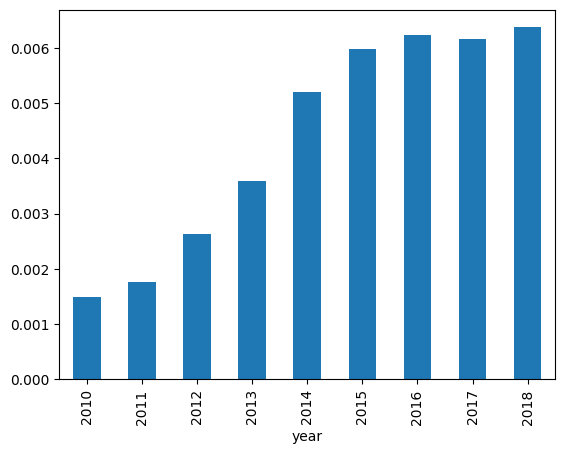

In [22]:
print((main_dataframe.loc[main_dataframe["is_against_women"] == True].groupby(["year"])["ddl_case_id"].count()/main_dataframe.groupby(["year"])["ddl_case_id"].count()).plot(kind='bar'))

# Impact of Nirbhaya Case
The delhi gang rape and murder case that came to national attention at the end of 2012 was a ~ point in the conversation around gender-based violence in India. [new laws + fast track courts] [ppl wanted harsh punishment].
[insert oberservation]

This text analyses various factors related to gender-based crimes in the pre and post-Nirbhaya era. The factors considered are:
- Number of cases filed [mention new laws + more crime/ more reporting dilemma]
- Percentage of cases that resulted in convictions [change in attitude of judges?]
- Time taken for final verdict from date of filing [mention fasttrack courts]

In [12]:
disp_key_df = pd.read_csv('../../../csv/keys/disp_name_key.csv')
print(disp_key_df["disp_name_s"].unique())

['258 crpc' 'abated' 'absconded' 'acquitted' 'allowed' 'appeal accepted'
 'award' 'bail granted' 'bail refused' 'bail rejected' 'cancelled'
 'closed' 'committed' 'compounded' 'compromise' 'confession'
 'contest-allowed' 'converted' 'convicted' 'decided' 'died' 'dismissed'
 'disposal in lok adalat' 'disposed' 'disposed-otherwise'
 'disposition var missing' 'ex-parte' 'execution' 'fine' 'judgement'
 'not press' 'other' 'otherwise' 'p.o. consign' 'partly decreed'
 'plea bargaining' 'plead guilty' 'prison' 'probation' 'procedural'
 'quash' 'referred to lok adalat' 'reject' 'remanded' 'settled' 'sine die'
 'stayed' 'transferred' 'uncontested' 'untrace' 'withdrawn' 'bail order']


In [42]:
conv_disp_name = set(['convicted', 'plead guilty', 'prison'])
disp_key_df["year_code"] = disp_key_df["year"].astype(str)+disp_key_df["disp_name"].astype(str)
conv_disp_keys = disp_key_df.loc[disp_key_df["disp_name_s"].isin(conv_disp_name)]
conv_disp_set = conv_disp_keys["year_code"].unique()

In [20]:
print(main_dataframe['disp_name'])

0          26
1          26
2          26
3          22
4          25
           ..
4281322    30
4281323    42
4281324    42
4281325    20
4281326    22
Name: disp_name, Length: 80935944, dtype: int64


In [52]:
'''
1. crime against women + count /per era\
2. crime against women + verdict convicting /per era\
3. crime against women + (final date - filing date) /per era\
'''
# division: 2010-2012
# division: 2013-2018
pivot_year = 2012
# test = set([2012])
main_dataframe["year_code"] = main_dataframe["year"].astype(str) + main_dataframe["disp_name"].astype(str)
# main_dataframe["convicted"] = main_dataframe["year"].apply(lambda x: x )
# convicted_df = main_dataframe.loc((main_dataframe["year"].isin(conv_disp_set)))


In [58]:
print(main_dataframe["ddl_case_id"].count())

80935944


In [54]:
main_dataframe["convicted"] = main_dataframe["year_code"].apply(lambda x: x in conv_disp_set)


In [59]:
print(main_dataframe["convicted"].count())

80935944


In [53]:
print(convicted_df)

                      ddl_case_id  year  state_code  dist_code  court_no  \
357      01-01-01-203008000982012  2012           1          1         1   
375      01-01-01-203008001182012  2012           1          1         1   
411      01-01-01-203008001562012  2012           1          1         1   
457      01-01-01-203008002032012  2012           1          1         1   
516      01-01-01-203308002662012  2012           1          1         1   
...                           ...   ...         ...        ...       ...   
4281204  32-01-01-211000001612010  2010          32          1         1   
4281296  32-01-01-211200000012010  2010          32          1         1   
4281297  32-01-01-211200000032010  2010          32          1         1   
4281298  32-01-01-211200000042010  2010          32          1         1   
4281304  32-01-01-211200000102010  2010          32          1         1   

                     cino                         judge_position  \
357      MHNB030005

In [65]:
print(main_dataframe["is_against_women"].count())

80935944


In [68]:
temp_df = main_dataframe.loc[main_dataframe["is_against_women"] == True]
print(temp_df["ddl_case_id"].count())

407014


In [67]:
temp_df = temp_df.loc[temp_df['convicted']==True]
print(temp_df["ddl_case_id"].count())

782


In [57]:
# 1. crime against women + count /per era\
# 2. crime against women + verdict convicting /per era\
# 3. crime against women + (final date - filing date) /per era\

total_cases_crimes_against_women = temp_df["ddl_case_id"].count()
print(total_cases_crimes_against_women)

782


Out of 

# Change of Ruling Parties
In mid-2014, almost exactly the middle of the assessed dataset, India saw a major change in politics with Narendra Modi of BJP replacing the long-serving Manmohan Singh of the Congress. With women's empowerment being a major point on both parties' manifestoes, [insert oberservation].

This text analyses various factors related to gender-based crimes in the pre and post-Nirbhaya era. The factors considered are:
- Number of cases filed [mention victim blaming by ministers and people in percieved power]
- Percentage of cases that resulted in convictions [change in attitude of judges?]
- Time taken for final verdict from date of filing [pressure from people on gov to fulfil promises in turn on judiciary]

> State gov analysis -> any insights about federation?

In [ ]:
'''
1. crime against women + count /per gov-era\
2. crime against women + verdict convicting /per gov-era\
3. crime against women + (final date - filing date) /per gov-era\
'''
# division: 2010-2014
# division: 2015-2018
pivot_year = 2014

pre_piv_cases_df = main_dataframe.loc(main_dataframe['year']<=pivot_year)
post_piv_cases_df = main_dataframe.loc(main_dataframe['year']>pivot_year)

# total number of cases related to crimes against women which were filed in Congress era
pre_piv_total = len(pre_piv_cases_df.index) 
pre_piv_per_year = pre_piv_total/(pivot_year-2009)

# total number of cases related to crimes against women which were filed in BJP era
post_piv_total = len(post_piv_cases_df.index)
post_piv_per_year = post_piv_total/(2018-pivot_year)

# What crimes do women commit?
But what about when women are the ones committing the crimes?

- Laws about gender-related crimes in India focus on women as the victim. => Obviously low women (who are the women who are accused of (more interesting than convicted because it shows that its possible to accuse women) these crimes against other women?)
- Women are socialised/ expected to be nurturing, care for family, be jealous of other women. => How does this affect crimes commited by them? They do commit less crimes overall (obv) but do they commit certain kinds of crimes relatively more than others? What could be the reason behind these? 
- As the expectations from women change over time and maybe become less/ more traditionally "manly" [cite], are more cases files against them? Are they necessarily committing more crimes?   

In [ ]:
'''
1. defendent woman + crime against woman
2. defendent woman + verdict convicting /per crime\
3. defendent woman + verdict convicting /per years\
'''
main_dataframe.loc((main_dataframe["female_defendant"]=="1 female") & (main_dataframe["is_against_women"]==True))